In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Net Exporter

In [3]:
imp_exp = pd.read_csv('data/natgas-imports-exports-netimports.csv', skiprows = 6,
                     names = ['Year', 'Imports', 'Exports'])

imp_exp['Net Export'] =  imp_exp['Exports'] - imp_exp['Imports']

imp_exp.head()

,Year,Imports,Exports,Net Export
0,1950,0.00,0.03,0.03
1,1951,0.00,0.02,0.02
2,1952,0.01,0.03,0.02
3,1953,0.01,0.03,0.02
4,1954,0.01,0.03,0.02


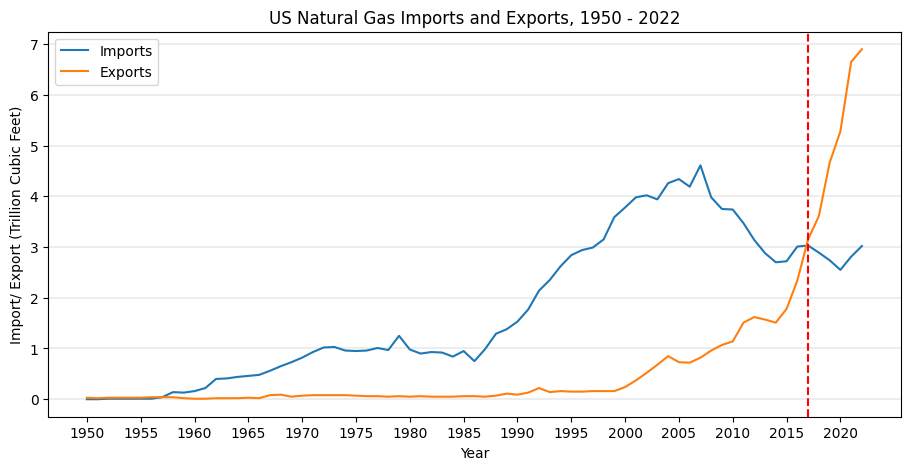

In [4]:
imp_exp.plot('Year', ['Imports', 'Exports'],
             title = 'US Natural Gas Imports and Exports, 1950 - 2022',
             ylabel = 'Import/ Export (Trillion Cubic Feet)',
            figsize = (11,5))
plt.xticks(np.arange(1950, 2022, 5))
plt.grid(axis='y', color='gray', linewidth=0.2)
plt.axvline(x=2017, color='red', linestyle = '--');

In [5]:
#show that US changed to net exporter in 2017
imp_exp[imp_exp["Year"].isin([2016, 2017])][['Year', 'Net Export']]

,Year,Net Export
66,2016,-0.67
67,2017,0.12


<Axes: xlabel='Year'>

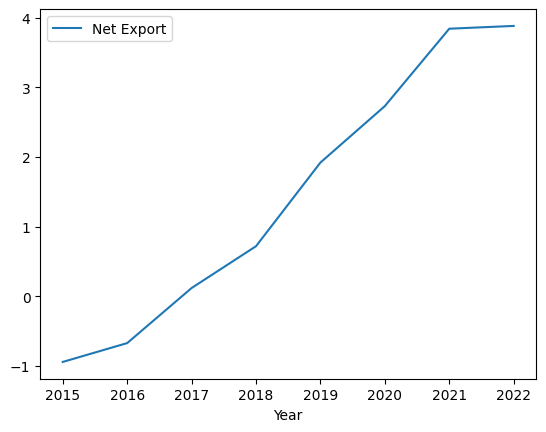

In [6]:
imp_exp[imp_exp["Year"] >= 2015].plot('Year', 'Net Export')

## Prices

In [7]:
#Japan-Korea futures start Oct 2012
jap_kor = pd.read_csv('data/LNG Japan_Korea Marker PLATTS Future Historical Data.csv',
                       usecols = ['Date', 'Price'], parse_dates = ["Date"])

jap_kor.rename(columns = {'Price' : 'Japan-Korea Price'}, inplace = True)

jap_kor.tail()

,Date,Japan-Korea Price
124,2014-07-01,10.665
125,2013-02-01,19.650
126,2013-01-01,19.200
127,2012-11-01,13.530
128,2012-10-01,13.450


In [8]:
#Dutch futures start Nov 2017
dutch = pd.read_csv('data/Dutch TTF Natural Gas Futures Historical Data.csv',
                       usecols = ['Date', 'Price'], parse_dates = ["Date"])

dutch.rename(columns = {'Price' : 'Dutch Price'}, inplace = True)

dutch.tail()

,Date,Dutch Price
80,2018-03-01,18.225
81,2018-02-01,17.350
82,2018-01-01,17.880
83,2017-12-01,19.620
84,2017-11-01,20.305


In [9]:
#Henry Hub start Jan 1997
henry_hub = pd.read_csv('data/Henry_Hub_Natural_Gas_Spot_Price.csv',
                       skiprows = 5, names = ['Date', 'Henry Hub Price'])

henry_hub['Date'] = pd.to_datetime(henry_hub['Date'], format='%b %Y')

henry_hub.tail()

,Date,Henry Hub Price
328,1997-05-01,2.25
329,1997-04-01,2.03
330,1997-03-01,1.89
331,1997-02-01,2.15
332,1997-01-01,3.45


In [10]:
futures = henry_hub.merge(jap_kor, on = "Date", how = "left").merge(dutch, on = "Date", how = "left")

futures = futures[futures["Date"] >= '2010-01-01']

futures.tail()

,Date,Henry Hub Price,Japan-Korea Price,Dutch Price
172,2010-05-01,4.14,NaN,NaN
173,2010-04-01,4.03,NaN,NaN
174,2010-03-01,4.29,NaN,NaN
175,2010-02-01,5.32,NaN,NaN
176,2010-01-01,5.83,NaN,NaN


<Axes: xlabel='Date'>

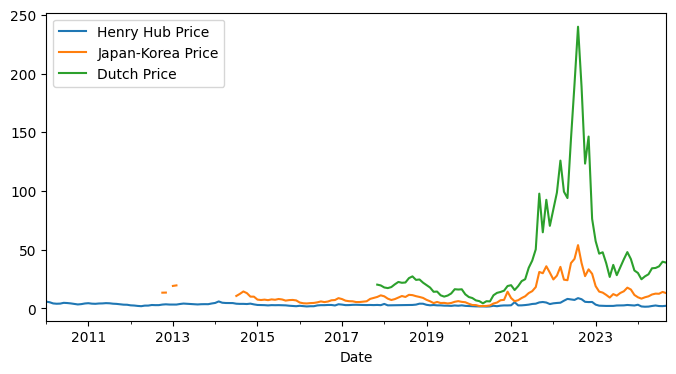

In [11]:
futures.plot('Date', ['Henry Hub Price', 'Japan-Korea Price', 'Dutch Price'],
             figsize = (8,4))